# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

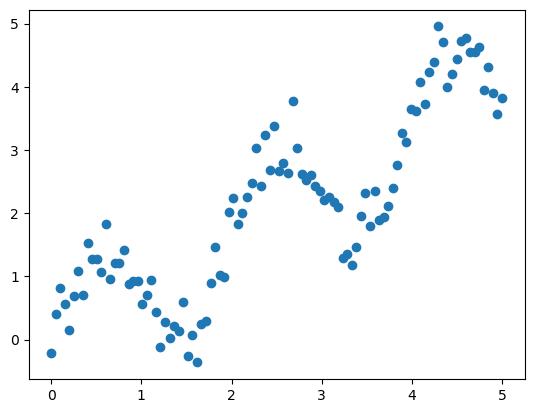

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [7]:
regr_lin.fit(X,y)

LinearRegression()

0.6087958056710282


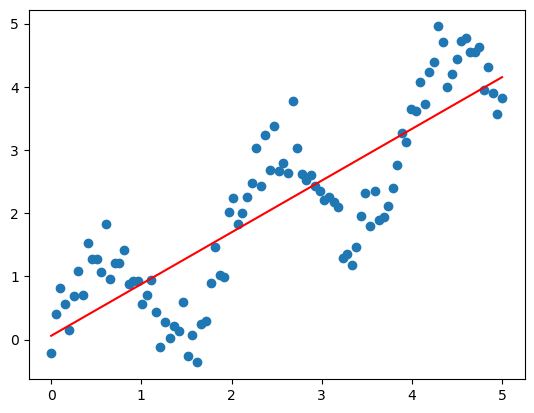

In [8]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [11]:
print(x.shape)

(100,)


In [10]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [11]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

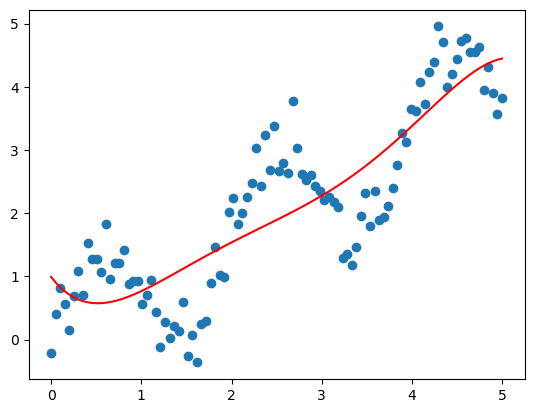

In [13]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.85539225  2.57493735 -1.16676691  0.24243386 -0.01834086]
interception:  0.9902472740727486


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.99024727, 0.9029599 , 0.82792867, 0.76430759, 0.7112871 ,
       0.66809331, 0.6339873 , 0.6082644 , 0.59025345, 0.57931607,
       0.57484598, 0.57626822, 0.58303847, 0.59464231, 0.6105945 ,
       0.63043825, 0.65374449, 0.68011118, 0.70916255, 0.74054841,
       0.77394339, 0.80904624, 0.8455791 , 0.8832868 , 0.92193608,
       0.96131493, 1.00123183, 1.04151503, 1.08201186, 1.12258794,
       1.16312652, 1.20352773, 1.24370787, 1.28359864, 1.32314651,
       1.36231189, 1.40106848, 1.43940253, 1.47731208, 1.51480631,
       1.55190475, 1.58863657, 1.62503989, 1.66116102, 1.69705377,
       1.73277868, 1.76840235, 1.80399667, 1.83963814, 1.87540712,
       1.91138709, 1.94766397, 1.98432538, 2.02145989, 2.05915634,
       2.09750309, 2.13658729, 2.17649418, 2.21730637, 2.25910307,
       2.30195943, 2.34594577, 2.39112687, 2.43756127, 2.4853005 ,
       2.53438841, 2.5848604 , 2.63674273, 2.69005177, 2.7447933 ,
       2.80096179, 2.85853963, 2.91749647, 2.97778846, 3.03935

In [16]:
regr_poly.predict(X_poly)

array([0.99024727, 0.9029599 , 0.82792867, 0.76430759, 0.7112871 ,
       0.66809331, 0.6339873 , 0.6082644 , 0.59025345, 0.57931607,
       0.57484598, 0.57626822, 0.58303847, 0.59464231, 0.6105945 ,
       0.63043825, 0.65374449, 0.68011118, 0.70916255, 0.74054841,
       0.77394339, 0.80904624, 0.8455791 , 0.8832868 , 0.92193608,
       0.96131493, 1.00123183, 1.04151503, 1.08201186, 1.12258794,
       1.16312652, 1.20352773, 1.24370787, 1.28359864, 1.32314651,
       1.36231189, 1.40106848, 1.43940253, 1.47731208, 1.51480631,
       1.55190475, 1.58863657, 1.62503989, 1.66116102, 1.69705377,
       1.73277868, 1.76840235, 1.80399667, 1.83963814, 1.87540712,
       1.91138709, 1.94766397, 1.98432538, 2.02145989, 2.05915634,
       2.09750309, 2.13658729, 2.17649418, 2.21730637, 2.25910307,
       2.30195943, 2.34594577, 2.39112687, 2.43756127, 2.4853005 ,
       2.53438841, 2.5848604 , 2.63674273, 2.69005177, 2.7447933 ,
       2.80096179, 2.85853963, 2.91749647, 2.97778846, 3.03935

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3 #標準差

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

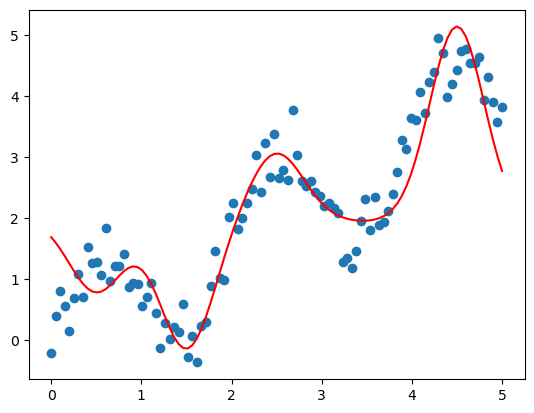

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.1952638  -2.12441305  1.0800815  -0.04303984  3.15295199]
interception:  1.9881109711929743


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

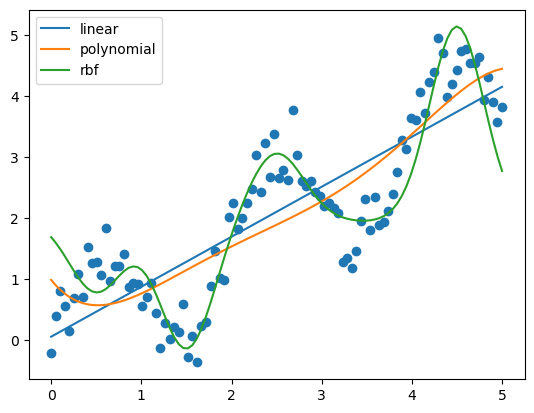

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6087958056710282


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5464356005254125


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.25843348732956367
